In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
tickers=['^NSEBANK','^NSEI','^BSESN']
data = pd.DataFrame()
for ticker in tickers:
    data[ticker]=yf.download(ticker,start='2010-01-01',end='2025-7-7')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3532 entries, 2010-01-04 to 2025-07-04
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ^NSEBANK  3532 non-null   float64
 1   ^NSEI     3530 non-null   float64
 2   ^BSESN    3529 non-null   float64
dtypes: float64(3)
memory usage: 110.4 KB


In [4]:
data.head()

,^NSEBANK,^NSEI,^BSESN
Date,,,
2010-01-04,9112.244141,5232.200195,17558.730469
2010-01-05,9192.043945,5277.899902,17686.240234
2010-01-06,9222.892578,5281.799805,17701.130859
2010-01-07,9192.843750,5263.100098,17615.720703
2010-01-08,9160.593750,5244.750000,17540.289062


In [5]:
data.isna().sum()

^NSEBANK    0
^NSEI       2
^BSESN      3
dtype: int64

In [6]:
## Dropping Null Values
data.dropna(inplace=True)

In [7]:
data.isna().sum()

^NSEBANK    0
^NSEI       0
^BSESN      0
dtype: int64

In [8]:
data=data.asfreq('B')

In [9]:
data.head()

,^NSEBANK,^NSEI,^BSESN
Date,,,
2010-01-04,9112.244141,5232.200195,17558.730469
2010-01-05,9192.043945,5277.899902,17686.240234
2010-01-06,9222.892578,5281.799805,17701.130859
2010-01-07,9192.843750,5263.100098,17615.720703
2010-01-08,9160.593750,5244.750000,17540.289062


In [10]:
data.isna().sum()

^NSEBANK    518
^NSEI       518
^BSESN      518
dtype: int64

In [11]:
data.fillna(method='ffill',inplace=True)

In [12]:
data.isna().sum()

^NSEBANK    0
^NSEI       0
^BSESN      0
dtype: int64

In [13]:
## Simplyfying the Datasets
data['Market_value']=data['^NSEBANK']

In [14]:
## Adding Returns to the dataframe
data['returns']=data.Market_value.pct_change(1)*100
data=data.iloc[1:]
data.head()

,^NSEBANK,^NSEI,^BSESN,Market_value,returns
Date,,,,,
2010-01-05,9192.043945,5277.899902,17686.240234,9192.043945,0.875743
2010-01-06,9222.892578,5281.799805,17701.130859,9222.892578,0.335601
2010-01-07,9192.843750,5263.100098,17615.720703,9192.843750,-0.325807
2010-01-08,9160.593750,5244.750000,17540.289062,9160.593750,-0.350816
2010-01-11,9173.443359,5249.399902,17526.710938,9173.443359,0.140270


In [15]:
## creating returns for sensex
## Adding Returns to the dataframe
data['ret_sensex']=data['^BSESN'].pct_change(1)*100
data=data.iloc[1:]
data.head()

,^NSEBANK,^NSEI,^BSESN,Market_value,returns,ret_sensex
Date,,,,,,
2010-01-06,9222.892578,5281.799805,17701.130859,9222.892578,0.335601,0.084193
2010-01-07,9192.843750,5263.100098,17615.720703,9192.843750,-0.325807,-0.482512
2010-01-08,9160.593750,5244.750000,17540.289062,9160.593750,-0.350816,-0.428206
2010-01-11,9173.443359,5249.399902,17526.710938,9173.443359,0.140270,-0.077411
2010-01-12,8984.995117,5210.399902,17422.509766,8984.995117,-2.054280,-0.594528


In [16]:
## creating returns for nifty 50
## Adding Returns to the dataframe
data['ret_nif50']=data['^NSEI'].pct_change(1)*100
data=data.iloc[1:]
data.head()

,^NSEBANK,^NSEI,^BSESN,Market_value,returns,ret_sensex,ret_nif50
Date,,,,,,,
2010-01-07,9192.843750,5263.100098,17615.720703,9192.843750,-0.325807,-0.482512,-0.354040
2010-01-08,9160.593750,5244.750000,17540.289062,9160.593750,-0.350816,-0.428206,-0.348656
2010-01-11,9173.443359,5249.399902,17526.710938,9173.443359,0.140270,-0.077411,0.088658
2010-01-12,8984.995117,5210.399902,17422.509766,8984.995117,-2.054280,-0.594528,-0.742942
2010-01-13,8925.996094,5233.950195,17509.800781,8925.996094,-0.656639,0.501024,0.451986


In [17]:
data.head()

,^NSEBANK,^NSEI,^BSESN,Market_value,returns,ret_sensex,ret_nif50
Date,,,,,,,
2010-01-07,9192.843750,5263.100098,17615.720703,9192.843750,-0.325807,-0.482512,-0.354040
2010-01-08,9160.593750,5244.750000,17540.289062,9160.593750,-0.350816,-0.428206,-0.348656
2010-01-11,9173.443359,5249.399902,17526.710938,9173.443359,0.140270,-0.077411,0.088658
2010-01-12,8984.995117,5210.399902,17422.509766,8984.995117,-2.054280,-0.594528,-0.742942
2010-01-13,8925.996094,5233.950195,17509.800781,8925.996094,-0.656639,0.501024,0.451986


In [18]:
## Deleting Extra Columns 
del data['^NSEBANK']

In [19]:
data.head()

,^NSEI,^BSESN,Market_value,returns,ret_sensex,ret_nif50
Date,,,,,,
2010-01-07,5263.100098,17615.720703,9192.843750,-0.325807,-0.482512,-0.354040
2010-01-08,5244.750000,17540.289062,9160.593750,-0.350816,-0.428206,-0.348656
2010-01-11,5249.399902,17526.710938,9173.443359,0.140270,-0.077411,0.088658
2010-01-12,5210.399902,17422.509766,8984.995117,-2.054280,-0.594528,-0.742942
2010-01-13,5233.950195,17509.800781,8925.996094,-0.656639,0.501024,0.451986


In [20]:
data.describe()

,^NSEI,^BSESN,Market_value,returns,ret_sensex,ret_nif50
count,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,11382.399405,37845.054804,25088.106462,0.055478,0.043574,0.044165
std,5820.915693,19355.269411,13319.382374,1.442519,1.019206,1.022797
min,4544.200195,15175.080078,7798.458984,-16.734013,-13.152580,-12.980466
25%,6159.712646,20661.177246,12427.330566,-0.538462,-0.380131,-0.378491
50%,9794.150391,31654.985352,22276.190430,0.000000,0.000000,0.000000
75%,15853.012695,53008.156250,35129.088867,0.646391,0.519816,0.524536
max,26216.050781,85836.117188,57459.449219,19.437570,10.548618,11.307487


In [21]:
## Spliting the Date
size=int(len(data)*0.8)
train=data.iloc[:size]
test=data.iloc[size:]

In [22]:
## Seting trainig data as df for simplicity
df=train.copy()

In [23]:
train.tail()

,^NSEI,^BSESN,Market_value,returns,ret_sensex,ret_nif50
Date,,,,,,
2022-05-24,16125.150391,54052.609375,34289.750000,0.124235,-0.434714,-0.552275
2022-05-25,16025.799805,53749.261719,34339.101562,0.143925,-0.561208,-0.616122
2022-05-26,16170.150391,54252.531250,35094.492188,2.199797,0.936328,0.900739
2022-05-27,16352.450195,54884.660156,35612.886719,1.477139,1.165160,1.127385
2022-05-30,16661.400391,55925.738281,35826.531250,0.599908,1.896847,1.889321


In [24]:
df.tail()

,^NSEI,^BSESN,Market_value,returns,ret_sensex,ret_nif50
Date,,,,,,
2022-05-24,16125.150391,54052.609375,34289.750000,0.124235,-0.434714,-0.552275
2022-05-25,16025.799805,53749.261719,34339.101562,0.143925,-0.561208,-0.616122
2022-05-26,16170.150391,54252.531250,35094.492188,2.199797,0.936328,0.900739
2022-05-27,16352.450195,54884.660156,35612.886719,1.477139,1.165160,1.127385
2022-05-30,16661.400391,55925.738281,35826.531250,0.599908,1.896847,1.889321


In [25]:
test.head()

,^NSEI,^BSESN,Market_value,returns,ret_sensex,ret_nif50
Date,,,,,,
2022-05-31,16584.550781,55566.410156,35486.984375,-0.947753,-0.642509,-0.461243
2022-06-01,16522.750000,55381.171875,35620.386719,0.375919,-0.333364,-0.372641
2022-06-02,16628.000000,55818.109375,35613.234375,-0.020079,0.788964,0.637000
2022-06-03,16584.300781,55769.230469,35274.640625,-0.950753,-0.087568,-0.262805
2022-06-06,16569.550781,55675.320312,35309.789062,0.099642,-0.168391,-0.088940


## ploting ACF anf PACF plots

Text(0.5, 1.0, 'ACF Bank Nifty')

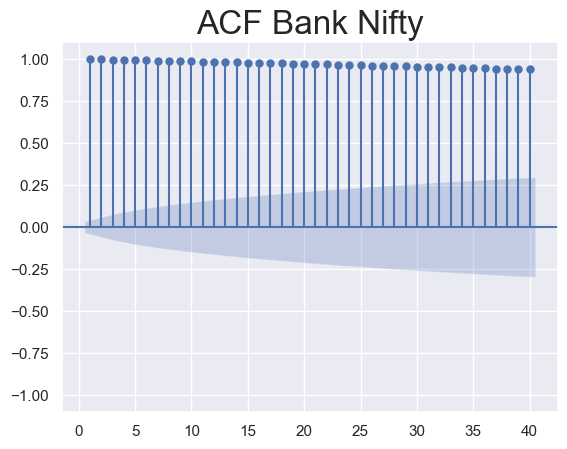

In [26]:
## ACF
sgt.plot_acf(df.Market_value,lags=40,zero=False)
plt.ylim(-1.1,1.1)
plt.title("ACF Bank Nifty",size=24)

Text(0.5, 1.0, 'PACF Bank Nifty')

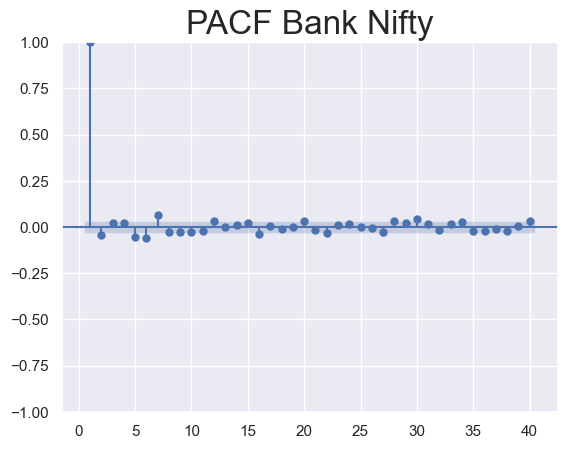

In [27]:
## Pacf 
sgt.plot_pacf(df.Market_value,lags=40,zero=False,method=('ols'))
plt.title("PACF Bank Nifty",size=24)

## LLR Test

In [28]:
## Defining LLR Test for Easy Comparison
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Multiple ARMA models for many Lags and comparing them (for Prices)

In [29]:
model_ar1_ma1 = ARIMA(df.Market_value, order=(1,0,1))
result_ar1_ma1=model_ar1_ma1.fit()
result_ar1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3233
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -23145.293
Date:                Sun, 28 Sep 2025   AIC                          46298.587
Time:                        18:21:40   BIC                          46322.911
Sample:                    01-07-2010   HQIC                         46307.303
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.982e+04   1.03e+04      1.926      0.054    -350.327       4e+04
ar.L1          0.9996      0.001   1601.762      0.000       0.998       1.001
ma.L1          0.0482      0.010      4.968      0.000       0.029       0.067
sigma2      9.665e+04    834.021    115.889      0.000     9.5e+04    9.83e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             29970.02
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               7.80   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
model_ar2_ma1 = ARIMA(df.Market_value, order=(2,0,1))
result_ar2_ma1=model_ar2_ma1.fit()
result_ar2_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3233
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -23145.222
Date:                Sun, 28 Sep 2025   AIC                          46300.443
Time:                        18:21:40   BIC                          46330.849
Sample:                    01-07-2010   HQIC                         46311.339
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.982e+04   6267.596      3.162      0.002    7536.678    3.21e+04
ar.L1          0.8148      0.180      4.520      0.000       0.461       1.168
ar.L2          0.1845      0.180      1.024      0.306      -0.169       0.538
ma.L1          0.2322      0.177      1.309      0.190      -0.115       0.580
sigma2      9.662e+04    834.368    115.801      0.000     9.5e+04    9.83e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             30002.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               7.78   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model_ar1_ma2 = ARIMA(df.Market_value, order=(1,0,2))
result_ar1_ma2=model_ar1_ma2.fit()
result_ar1_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3233
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -23144.923
Date:                Sun, 28 Sep 2025   AIC                          46299.846
Time:                        18:21:40   BIC                          46330.252
Sample:                    01-07-2010   HQIC                         46310.742
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.982e+04   1.02e+04      1.942      0.052    -182.613    3.98e+04
ar.L1          0.9996      0.001   1625.232      0.000       0.998       1.001
ma.L1          0.0467      0.010      4.729      0.000       0.027       0.066
ma.L2         -0.0146      0.009     -1.605      0.108      -0.033       0.003
sigma2      9.673e+04    839.543    115.223      0.000    9.51e+04    9.84e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             30211.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.79   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model_ar2_ma2 = ARIMA(df.Market_value, order=(2,0,2))
result_ar2_ma2=model_ar2_ma2.fit()
result_ar2_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3233
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -23144.802
Date:                Sun, 28 Sep 2025   AIC                          46301.604
Time:                        18:21:42   BIC                          46338.091
Sample:                    01-07-2010   HQIC                         46314.679
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.982e+04   9380.056      2.113      0.035    1436.370    3.82e+04
ar.L1          0.1205      0.144      0.838      0.402      -0.161       0.402
ar.L2          0.8787      0.144      6.121      0.000       0.597       1.160
ma.L1          0.9271      0.145      6.404      0.000       0.643       1.211
ma.L2          0.0343      0.015      2.293      0.022       0.005       0.064
sigma2      9.646e+04    871.202    110.721      0.000    9.48e+04    9.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             29454.19
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               7.80   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
model_ar3_ma1 = ARIMA(df.Market_value, order=(3,0,1))
result_ar3_ma1=model_ar3_ma1.fit()
result_ar3_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3233
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -23145.019
Date:                Sun, 28 Sep 2025   AIC                          46302.038
Time:                        18:21:43   BIC                          46338.525
Sample:                    01-07-2010   HQIC                         46315.113
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.982e+04   5244.440      3.779      0.000    9542.028    3.01e+04
ar.L1          0.9954      0.474      2.098      0.036       0.066       1.925
ar.L2         -0.0129      0.497     -0.026      0.979      -0.988       0.962
ar.L3          0.0168      0.025      0.675      0.499      -0.032       0.066
ma.L1          0.0514      0.475      0.108      0.914      -0.880       0.982
sigma2      9.662e+04    846.297    114.166      0.000     9.5e+04    9.83e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             30159.55
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               7.77   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
model_ar3_ma2 = ARIMA(df.Market_value, order=(3,0,2))
result_ar3_ma2=model_ar3_ma2.fit()
result_ar3_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3233
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -23138.262
Date:                Sun, 28 Sep 2025   AIC                          46290.523
Time:                        18:21:47   BIC                          46333.091
Sample:                    01-07-2010   HQIC                         46305.777
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.982e+04   5638.288      3.515      0.000    8770.099    3.09e+04
ar.L1         -0.2502      0.027     -9.099      0.000      -0.304      -0.196
ar.L2          0.3627      0.020     17.964      0.000       0.323       0.402
ar.L3          0.8854      0.028     32.027      0.000       0.831       0.940
ma.L1          1.2693      0.023     54.072      0.000       1.223       1.315
ma.L2          0.9230      0.023     39.706      0.000       0.877       0.969
sigma2      9.615e+04    872.721    110.168      0.000    9.44e+04    9.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.85   Jarque-Bera (JB):             28447.28
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               7.65   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model_ar2_ma3 = ARIMA(df.Market_value, order=(2,0,3))
result_ar2_ma3=model_ar2_ma3.fit()
result_ar2_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3233
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -23143.240
Date:                Sun, 28 Sep 2025   AIC                          46300.480
Time:                        18:21:47   BIC                          46343.048
Sample:                    01-07-2010   HQIC                         46315.733
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.982e+04    1.1e+04      1.796      0.072   -1807.059    4.14e+04
ar.L1          0.7989      0.294      2.715      0.007       0.222       1.376
ar.L2          0.2006      0.294      0.682      0.495      -0.376       0.777
ma.L1          0.2495      0.294      0.850      0.395      -0.326       0.825
ma.L2         -0.0008      0.017     -0.045      0.964      -0.033       0.032
ma.L3         -0.0361      0.010     -3.653      0.000      -0.055      -0.017
sigma2      9.673e+04    851.149    113.649      0.000    9.51e+04    9.84e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             31014.84
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               7.76   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
model_ar3_ma3 = ARIMA(df.Market_value, order=(3,0,3))
result_ar3_ma3=model_ar3_ma3.fit()
result_ar3_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3233
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -23133.627
Date:                Sun, 28 Sep 2025   AIC                          46283.253
Time:                        18:21:49   BIC                          46331.902
Sample:                    01-07-2010   HQIC                         46300.686
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.982e+04      0.486   4.08e+04      0.000    1.98e+04    1.98e+04
ar.L1          1.0542      0.062     17.091      0.000       0.933       1.175
ar.L2         -0.8530      0.082    -10.444      0.000      -1.013      -0.693
ar.L3          0.7986      0.052     15.432      0.000       0.697       0.900
ma.L1         -0.0072      0.063     -0.114      0.909      -0.131       0.117
ma.L2          0.7580      0.056     13.419      0.000       0.647       0.869
ma.L3          0.0034      0.012      0.273      0.784      -0.021       0.028
sigma2      9.652e+04    853.807    113.046      0.000    9.48e+04    9.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             29936.12
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.67   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.88e+19. Standard errors may be unstable.
"""

Here I measured all the ARMA model till ARMA 3,3 Because doing further it would be time waste as it would be computationally expensive and more time consuming

## performing LLR test on model which have performed well which I have shortlisted by looking at there Log Likelihood and AIC for Example ARMA 3,3 2,3 3,2 1,1

In [37]:
LLR_test(model_ar1_ma1,model_ar3_ma2,DF=3)

np.float64(0.003)

In [38]:
LLR_test(model_ar3_ma2,model_ar3_ma3)

np.float64(0.002)

In [39]:
LLR_test(model_ar2_ma3,model_ar3_ma3)

np.float64(0.0)

## here Our best model is ARMA 3,3 as it outperforms both ARMA 3,2 and 2,3

Text(0.5, 1.0, 'ACF of Residuals for ARMA(3,3)')

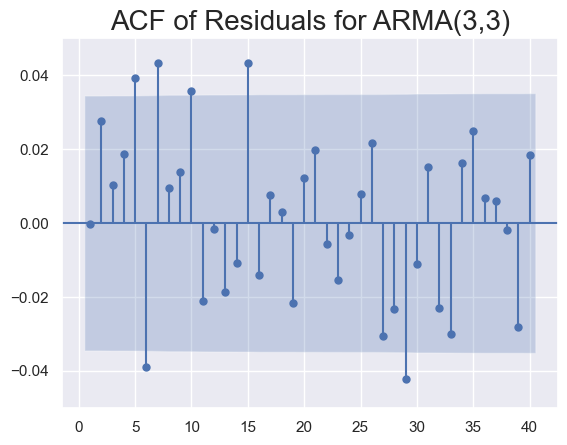

In [40]:
df['res_ar3_ma3']=result_ar3_ma3.resid
sgt.plot_acf(df.res_ar3_ma3[1:],zero=False,lags=40)
plt.ylim(-0.05,0.05)
plt.title("ACF of Residuals for ARMA(3,3)",size=20)

## Doing the same thing for returns

In [41]:
## Running Dicky Fuller test for Returns
sts.adfuller(df.returns)

(np.float64(-16.60589345401272),
 np.float64(1.7480061799479235e-29),
 10,
 3222,
 {'1%': np.float64(-3.432381197225056),
  '5%': np.float64(-2.8624374605672154),
  '10%': np.float64(-2.567247737994645)},
 np.float64(11835.29865302756))

## Ploting PACF and ACF for Returns

(-0.1, 0.1)

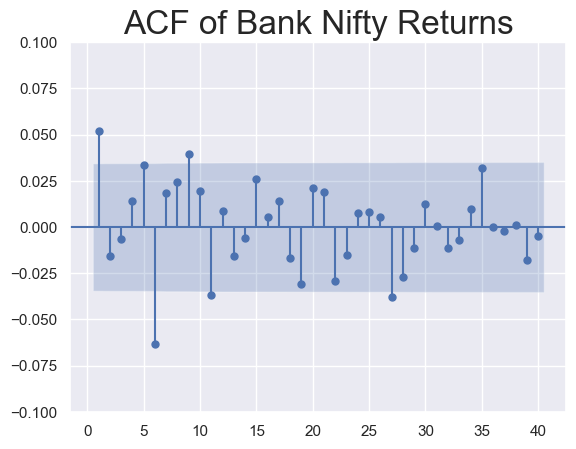

In [42]:
sgt.plot_acf(df.returns,lags=40,zero=False)
plt.title("ACF of Bank Nifty Returns",size=24)
plt.ylim(-0.1,0.1)

(-0.1, 0.1)

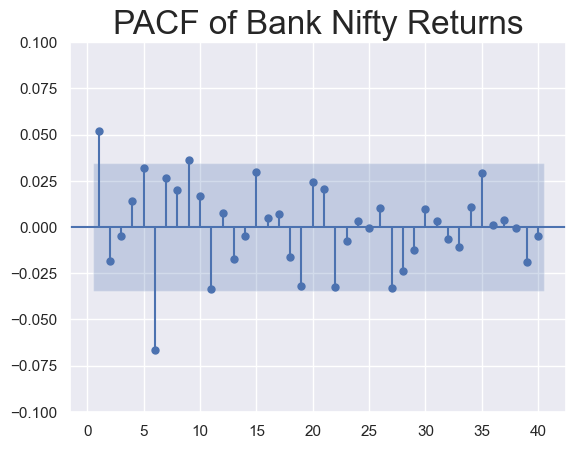

In [43]:
sgt.plot_pacf(df.returns,lags=40,zero=False)
plt.title("PACF of Bank Nifty Returns",size=24)
plt.ylim(-0.1,0.1)

## ARMA Models for Returns

In [44]:
model_ret_ar1_ma1=ARIMA(df.returns, order=(1,0,1))
results_ret_ar1_ma1 = model_ret_ar1_ma1.fit()
results_ret_ar1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3233
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5978.252
Date:                Sun, 28 Sep 2025   AIC                          11964.505
Time:                        18:22:01   BIC                          11988.830
Sample:                    01-07-2010   HQIC                         11973.221
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.028      1.894      0.058      -0.002       0.110
ar.L1         -0.2370      0.181     -1.309      0.191      -0.592       0.118
ma.L1          0.2900      0.176      1.647      0.100      -0.055       0.635
sigma2         2.3641      0.019    121.361      0.000       2.326       2.402
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36641.65
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.27
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model_ret_ar1_ma2=ARIMA(df.returns, order=(1,0,2))
results_ret_ar1_ma2 = model_ret_ar1_ma2.fit()
results_ret_ar1_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3233
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -5978.543
Date:                Sun, 28 Sep 2025   AIC                          11967.085
Time:                        18:22:01   BIC                          11997.491
Sample:                    01-07-2010   HQIC                         11977.981
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.031      1.708      0.088      -0.008       0.116
ar.L1          0.8996      1.556      0.578      0.563      -2.151       3.950
ma.L1         -0.8459      1.557     -0.543      0.587      -3.897       2.205
ma.L2         -0.0476      0.089     -0.534      0.593      -0.222       0.127
sigma2         2.3645      0.020    117.404      0.000       2.325       2.404
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36660.63
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.28
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model_ret_ar2_ma1=ARIMA(df.returns, order=(2,0,1))
results_ret_ar2_ma1 = model_ret_ar2_ma1.fit()
results_ret_ar2_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3233
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -5978.126
Date:                Sun, 28 Sep 2025   AIC                          11966.252
Time:                        18:22:02   BIC                          11996.658
Sample:                    01-07-2010   HQIC                         11977.148
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0539      0.029      1.852      0.064      -0.003       0.111
ar.L1          0.1462      0.572      0.255      0.798      -0.976       1.268
ar.L2         -0.0236      0.030     -0.775      0.438      -0.083       0.036
ma.L1         -0.0933      0.574     -0.163      0.871      -1.218       1.031
sigma2         2.3639      0.020    118.584      0.000       2.325       2.403
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36814.57
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model_ret_ar2_ma2=ARIMA(df.returns, order=(2,0,2))
results_ret_ar2_ma2 = model_ret_ar2_ma2.fit()
results_ret_ar2_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3233
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5974.070
Date:                Sun, 28 Sep 2025   AIC                          11960.141
Time:                        18:22:04   BIC                          11996.628
Sample:                    01-07-2010   HQIC                         11973.215
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.027      1.958      0.050   -6.33e-05       0.108
ar.L1         -0.0184      0.075     -0.246      0.806      -0.165       0.129
ar.L2         -0.8120      0.060    -13.492      0.000      -0.930      -0.694
ma.L1          0.0552      0.079      0.701      0.483      -0.099       0.210
ma.L2          0.7889      0.065     12.143      0.000       0.662       0.916
sigma2         2.3580      0.020    119.696      0.000       2.319       2.397
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):             36343.72
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
model_ret_ar3_ma1=ARIMA(df.returns, order=(3,0,1))
results_ret_ar3_ma1 = model_ret_ar3_ma1.fit()
results_ret_ar3_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3233
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -5978.098
Date:                Sun, 28 Sep 2025   AIC                          11968.197
Time:                        18:22:04   BIC                          12004.684
Sample:                    01-07-2010   HQIC                         11981.271
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.029      1.844      0.065      -0.003       0.111
ar.L1          0.0259      2.742      0.009      0.992      -5.349       5.400
ar.L2         -0.0169      0.143     -0.119      0.906      -0.297       0.263
ar.L3         -0.0055      0.053     -0.103      0.918      -0.110       0.099
ma.L1          0.0268      2.740      0.010      0.992      -5.344       5.398
sigma2         2.3638      0.020    118.330      0.000       2.325       2.403
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36892.77
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model_ret_ar3_ma2=ARIMA(df.returns, order=(3,0,2))
results_ret_ar3_ma2 = model_ret_ar3_ma2.fit()
results_ret_ar3_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3233
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -5972.889
Date:                Sun, 28 Sep 2025   AIC                          11959.779
Time:                        18:22:06   BIC                          12002.347
Sample:                    01-07-2010   HQIC                         11975.032
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.028      1.909      0.056      -0.001       0.109
ar.L1          0.1188      0.069      1.723      0.085      -0.016       0.254
ar.L2         -0.8825      0.056    -15.686      0.000      -0.993      -0.772
ar.L3          0.0364      0.016      2.238      0.025       0.005       0.068
ma.L1         -0.0656      0.067     -0.985      0.325      -0.196       0.065
ma.L2          0.8522      0.061     13.899      0.000       0.732       0.972
sigma2         2.3562      0.020    118.517      0.000       2.317       2.395
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36087.89
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
model_ret_ar2_ma3=ARIMA(df.returns, order=(2,0,3))
results_ret_ar2_ma3 = model_ret_ar2_ma3.fit()
results_ret_ar2_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3233
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -5972.952
Date:                Sun, 28 Sep 2025   AIC                          11959.905
Time:                        18:22:09   BIC                          12002.473
Sample:                    01-07-2010   HQIC                         11975.158
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0537      0.028      1.912      0.056      -0.001       0.109
ar.L1          0.0705      0.059      1.197      0.231      -0.045       0.186
ar.L2         -0.8795      0.057    -15.338      0.000      -0.992      -0.767
ma.L1         -0.0183      0.060     -0.306      0.760      -0.136       0.099
ma.L2          0.8509      0.063     13.582      0.000       0.728       0.974
ma.L3          0.0334      0.016      2.112      0.035       0.002       0.064
sigma2         2.3563      0.020    118.643      0.000       2.317       2.395
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36112.50
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
model_ret_ar3_ma3=ARIMA(df.returns, order=(3,0,3))
results_ret_ar3_ma3 = model_ret_ar3_ma3.fit()
results_ret_ar3_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3233
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -5971.861
Date:                Sun, 28 Sep 2025   AIC                          11959.721
Time:                        18:22:12   BIC                          12008.371
Sample:                    01-07-2010   HQIC                         11977.154
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.028      1.939      0.053      -0.001       0.108
ar.L1         -0.8315      0.116     -7.171      0.000      -1.059      -0.604
ar.L2         -0.8602      0.090     -9.571      0.000      -1.036      -0.684
ar.L3         -0.7072      0.091     -7.769      0.000      -0.886      -0.529
ma.L1          0.8812      0.114      7.712      0.000       0.657       1.105
ma.L2          0.8647      0.097      8.961      0.000       0.676       1.054
ma.L3          0.7101      0.085      8.377      0.000       0.544       0.876
sigma2         2.3547      0.020    114.952      0.000       2.315       2.395
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             35451.11
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Here I only used till ARMA 3,3 as I dont want to waste my time and this file too big the best model I found here were ARMA 3,3 3,2 and 2,3

## Performing LLR Test on Returns Value

In [52]:
LLR_test(model_ret_ar2_ma3,model_ret_ar3_ma3)

np.float64(0.139)

In [53]:
LLR_test(model_ret_ar3_ma2,model_ret_ar3_ma3)

np.float64(0.151)

Here I will use ARMA 3,2 model as  it gave more LLR_test Numbers so it would be better than ARMA 2,3

## Normalising the values

In [54]:
## Setting some benchmarks
benchmark=df.Market_value.iloc[0]
df['norm']=df.Market_value/benchmark*100

In [55]:
df.head()

,^NSEI,^BSESN,Market_value,returns,ret_sensex,ret_nif50,res_ar3_ma3,norm
Date,,,,,,,,
2010-01-07,5263.100098,17615.720703,9192.843750,-0.325807,-0.482512,-0.354040,-10628.096629,100.000000
2010-01-08,5244.750000,17540.289062,9160.593750,-0.350816,-0.428206,-0.348656,-33.837685,99.649184
2010-01-11,5249.399902,17526.710938,9173.443359,0.140270,-0.077411,0.088658,12.662639,99.788962
2010-01-12,5210.399902,17422.509766,8984.995117,-2.054280,-0.594528,-0.742942,-192.182371,97.739017
2010-01-13,5233.950195,17509.800781,8925.996094,-0.656639,0.501024,0.451986,-52.219739,97.097224


In [56]:
## Dickey Fuller Test for normalisation
sts.adfuller(df.norm)

(np.float64(-0.754735907671278),
 np.float64(0.8320579556677599),
 11,
 3221,
 {'1%': np.float64(-3.4323818283394387),
  '5%': np.float64(-2.862437739322552),
  '10%': np.float64(-2.5672478863984516)},
 np.float64(16889.2648610934))

In [57]:
## Getting normalised Returns
Bench_ret=df.returns.iloc[0]
df['norm_ret']=df.returns/Bench_ret*100
sts.adfuller(df.norm_ret)

(np.float64(-16.60589345401271),
 np.float64(1.7480061799479235e-29),
 10,
 3222,
 {'1%': np.float64(-3.432381197225056),
  '5%': np.float64(-2.8624374605672154),
  '10%': np.float64(-2.567247737994645)},
 np.float64(48520.028508009265))

In [58]:
df.head()

,^NSEI,^BSESN,Market_value,returns,ret_sensex,ret_nif50,res_ar3_ma3,norm,norm_ret
Date,,,,,,,,,
2010-01-07,5263.100098,17615.720703,9192.843750,-0.325807,-0.482512,-0.354040,-10628.096629,100.000000,100.000000
2010-01-08,5244.750000,17540.289062,9160.593750,-0.350816,-0.428206,-0.348656,-33.837685,99.649184,107.676133
2010-01-11,5249.399902,17526.710938,9173.443359,0.140270,-0.077411,0.088658,12.662639,99.788962,-43.053247
2010-01-12,5210.399902,17422.509766,8984.995117,-2.054280,-0.594528,-0.742942,-192.182371,97.739017,630.520654
2010-01-13,5233.950195,17509.800781,8925.996094,-0.656639,0.501024,0.451986,-52.219739,97.097224,201.542475


## Forecasting the data for future Predictions

In [59]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date='2022-06-1'
end_date='2025-01-01'

In [60]:
df_pred=result_ar3_ma3.predict(start=start_date,end=end_date)

Text(0.5, 1.0, 'predictions VS actual')

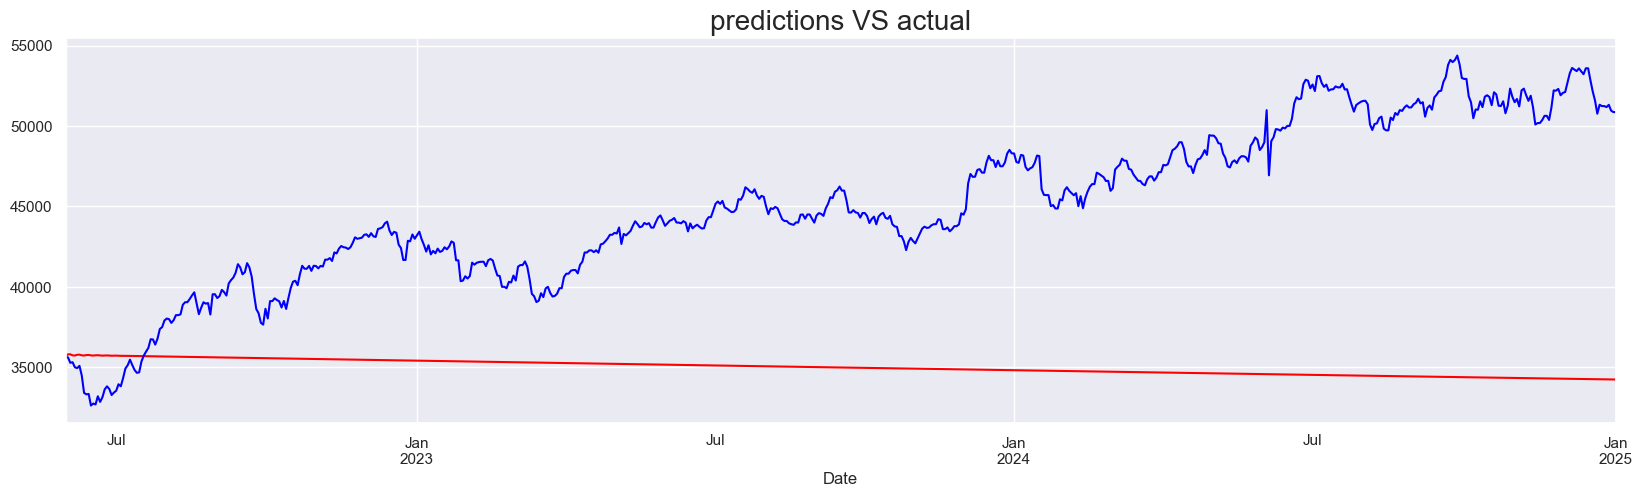

In [61]:
df_pred[start_date:end_date].plot(figsize=(20,5),color='red')
test.Market_value[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual",size=20)

Here we saw that this results seem very similar to our first AR and MA model 

In [62]:
df_pred_returns=results_ret_ar3_ma2.predict(start=start_date,end=end_date)

Text(0.5, 1.0, 'predictions VS actual')

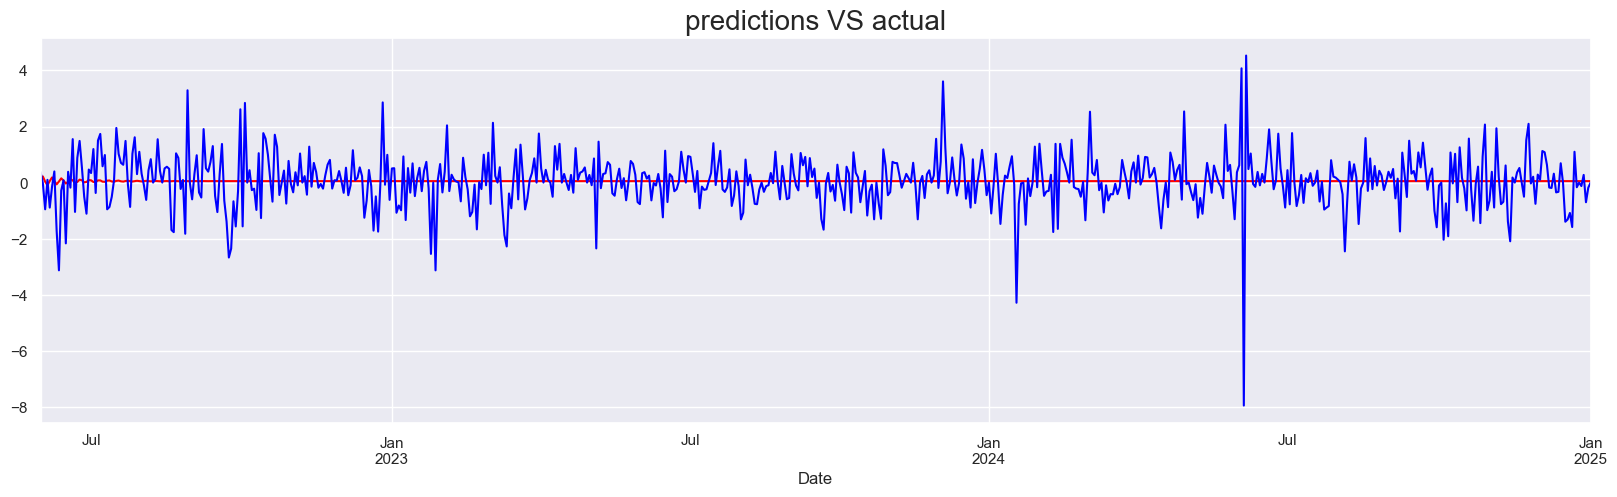

In [63]:
df_pred_returns[start_date:end_date].plot(figsize=(20,5),color='red')
test.returns[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual",size=20)

Here if we see closely we can see that there are some returns give on for first few days but they do not prerist so here this model performs well than the AR and MA separate models

## Predicting the same thing with ARMAX model lets see how much does the price changes

In [64]:
model_ar3_ma3_Xsensex_Xnifty_50=SARIMAX(df.Market_value,exog=df[['^BSESN','^NSEI']],order=(3,0,3),trend='c')
results_ar3_ma3_Xsensex_Xnifty_50=model_ar3_ma3_Xsensex_Xnifty_50.fit()
results_ar3_ma3_Xsensex_Xnifty_50.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3233
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -20639.178
Date:                Sun, 28 Sep 2025   AIC                          41298.356
Time:                        18:22:27   BIC                          41359.168
Sample:                    01-07-2010   HQIC                         41320.147
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7632      4.490      0.170      0.865      -8.036       9.563
^BSESN         0.5023      0.039     13.019      0.000       0.427       0.578
^NSEI          1.0542      0.131      8.039      0.000       0.797       1.311
ar.L1         -0.7900      0.005   -146.453      0.000      -0.801      -0.779
ar.L2          0.8043      0.002    336.604      0.000       0.800       0.809
ar.L3          0.9857      0.005    187.894      0.000       0.975       0.996
ma.L1          1.8573      0.013    144.237      0.000       1.832       1.883
ma.L2          1.1066      0.022     49.626      0.000       1.063       1.150
ma.L3          0.0624      0.012      5.128      0.000       0.039       0.086
sigma2      2.077e+04      0.009   2.29e+06      0.000    2.08e+04    2.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             14459.88
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               6.58   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.21e+20. Standard errors may be unstable.
"""

In [65]:
## Predicting Exog variable
pred_ARMAX = results_ar3_ma3_Xsensex_Xnifty_50.get_forecast(
    steps=len(test),
    exog=test[["^BSESN","^NSEI"]]
).predicted_mean


Here I used Get_forcast because I was not able to get aligned results when using predict

## forecasting price and returns data

Text(0.5, 1.0, 'predictions VS actual(ARMAX)')

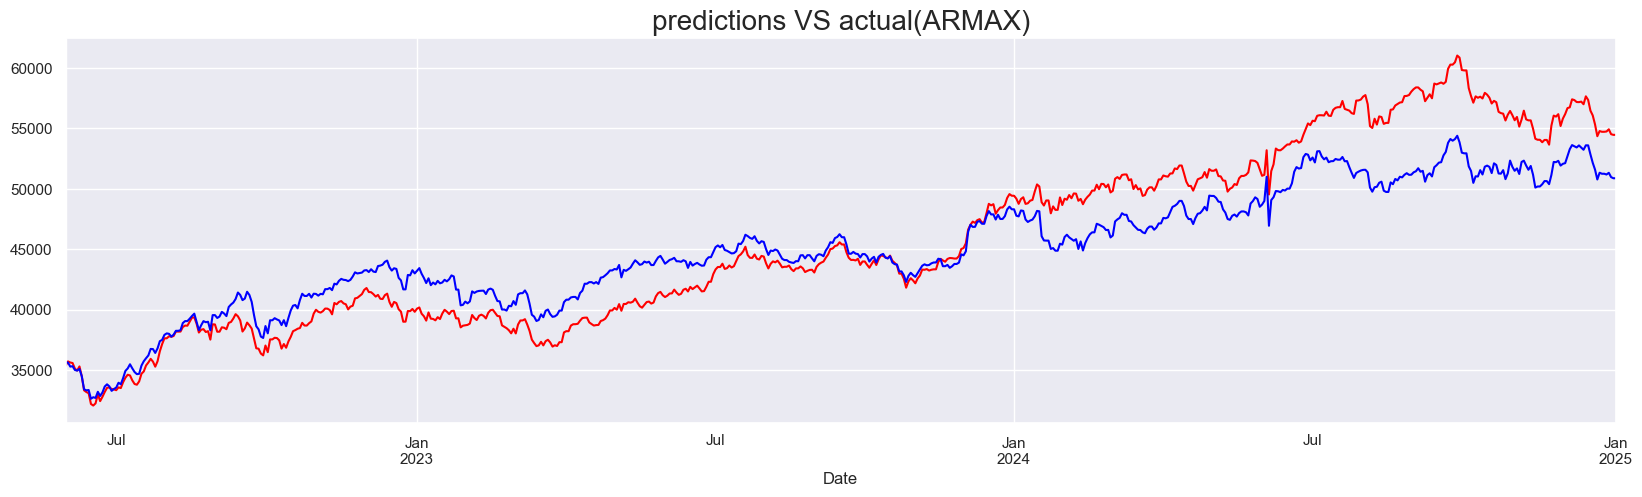

In [66]:
pred_ARMAX[start_date:end_date].plot(figsize=(20,5),color='red')
test.Market_value[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual(ARMAX)",size=20)

This is drastic change when we are using max model we are very closely prediction market data. Lets see the same thing for Returns

### Doing the same thing for returns

In [67]:
model_ret_ar3_ma2_Xsensex_Xnifty_50=ARIMA(df.returns,exog=df[['ret_nif50','ret_sensex']],order=(3,0,2))
results_ret_ar3_ma2_Xsensex_Xnifty_50=model_ret_ar3_ma2_Xsensex_Xnifty_50.fit()
results_ret_ar3_ma2_Xsensex_Xnifty_50.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3233
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -3404.646
Date:                Sun, 28 Sep 2025   AIC                           6827.293
Time:                        18:22:29   BIC                           6882.023
Sample:                    01-07-2010   HQIC                          6846.904
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.013      0.099      0.921      -0.024       0.026
ret_nif50      1.8949      0.060     31.376      0.000       1.777       2.013
ret_sensex    -0.6233      0.062    -10.110      0.000      -0.744      -0.502
ar.L1          0.7680      0.897      0.856      0.392      -0.990       2.526
ar.L2         -0.2834      0.745     -0.380      0.704      -1.744       1.178
ar.L3         -0.0026      0.051     -0.050      0.960      -0.102       0.097
ma.L1         -0.7150      0.896     -0.798      0.425      -2.471       1.041
ma.L2          0.2410      0.701      0.344      0.731      -1.133       1.615
sigma2         0.4811      0.006     83.413      0.000       0.470       0.492
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14766.82
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.48
Prob(H) (two-sided):                  0.01   Kurtosis:                        13.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
pred_ARMAX_ret= results_ret_ar3_ma2_Xsensex_Xnifty_50.predict(
    start=len(train["returns"]),
    end=len(train["returns"]) + len(test) - 1,
    exog=test[["ret_nif50","ret_sensex"]]
)

Text(0.5, 1.0, 'predictions VS actual(ARMAX) (for Returns)')

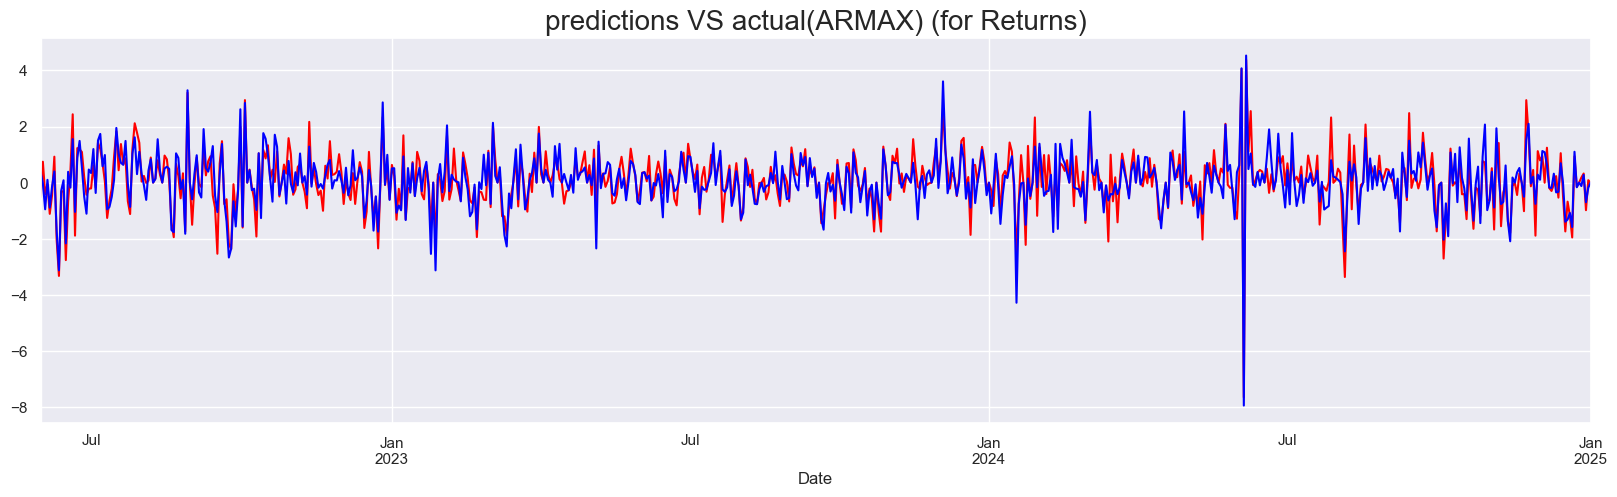

In [69]:
pred_ARMAX_ret[start_date:end_date].plot(figsize=(20,5),color='red')
test.returns[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual(ARMAX) (for Returns)",size=20)

## doing the same thing for SARMA 

In [70]:
model_ar3_ma3_sarma=SARIMAX(df.Market_value,order=(3,0,4),seasonal_order=(3,0,2,5))
results_ar3_ma3_sarma=model_ar3_ma3_sarma.fit()
results_ar3_ma3_sarma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                           Market_value   No. Observations:                 3233
Model:             SARIMAX(3, 0, 4)x(3, 0, [1, 2], 5)   Log Likelihood              -23146.911
Date:                                Sun, 28 Sep 2025   AIC                          46319.821
Time:                                        18:22:42   BIC                          46398.876
Sample:                                    01-07-2010   HQIC                         46348.149
                                         - 05-30-2022                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0600      0.010      5.914      0.000       0.040       0.080
ar.L2          0.0106      0.009      1.189      0.234      -0.007       0.028
ar.L3         -0.0004      0.009     -0.043      0.966      -0.019       0.018
ma.L1          1.0009      0.003    307.591      0.000       0.995       1.007
ma.L2          0.9877      0.005    215.698      0.000       0.979       0.997
ma.L3          0.9764      0.005    181.474      0.000       0.966       0.987
ma.L4          0.9843      0.005    218.539      0.000       0.976       0.993
ar.S.L5        0.8114      0.072     11.245      0.000       0.670       0.953
ar.S.L10       0.9889      0.067     14.860      0.000       0.858       1.119
ar.S.L15      -0.8016      0.085     -9.389      0.000      -0.969      -0.634
ma.S.L5        0.2226      0.075      2.982      0.003       0.076       0.369
ma.S.L10      -0.7658      0.089     -8.630      0.000      -0.940      -0.592
sigma2      9.656e+04    948.451    101.812      0.000    9.47e+04    9.84e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):             25678.69
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               7.67   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
df_pred_SARMA=results_ar3_ma3_sarma.predict(start=start_date,end=end_date)

Text(0.5, 1.0, 'predictions VS actual(ARMAX)')

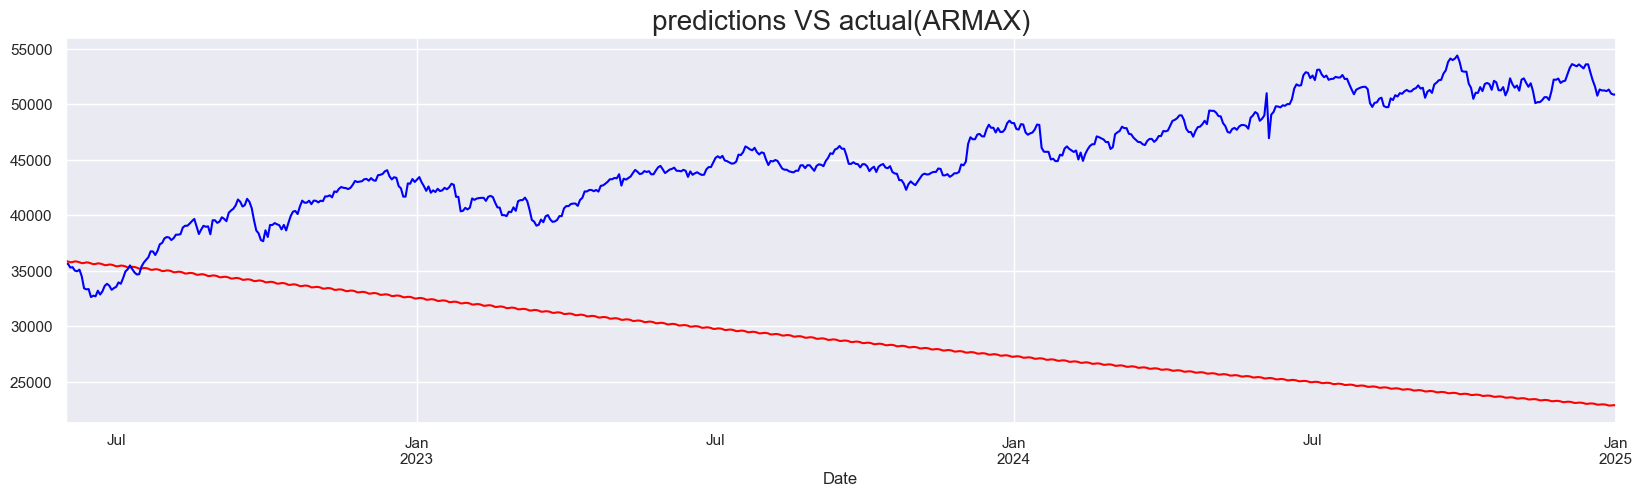

In [72]:
df_pred_SARMA[start_date:end_date].plot(figsize=(20,5),color='red')
test.Market_value[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual(ARMAX)",size=20)

The results are wiglier than our ARMA model and it is a little better than ARMA But very low compared to ARMAX model

## doing the same thing for returns

In [73]:
model_ret_ar3_ma3_sarma=SARIMAX(df.returns,order=(3,0,4),seasonal_order=(3,0,2,5))
results_ret_ar3_ma3_sarma=model_ret_ar3_ma3_sarma.fit()
results_ret_ar3_ma3_sarma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                returns   No. Observations:                 3233
Model:             SARIMAX(3, 0, 4)x(3, 0, [1, 2], 5)   Log Likelihood               -5967.201
Date:                                Sun, 28 Sep 2025   AIC                          11960.402
Time:                                        18:22:52   BIC                          12039.457
Sample:                                    01-07-2010   HQIC                         11988.730
                                         - 05-30-2022                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7065      0.204     -3.468      0.001      -1.106      -0.307
ar.L2         -0.7330      0.062    -11.898      0.000      -0.854      -0.612
ar.L3         -0.8693      0.186     -4.678      0.000      -1.234      -0.505
ma.L1          0.7602      0.204      3.724      0.000       0.360       1.160
ma.L2          0.7427      0.053     14.027      0.000       0.639       0.846
ma.L3          0.9006      0.179      5.025      0.000       0.549       1.252
ma.L4          0.0557      0.025      2.201      0.028       0.006       0.105
ar.S.L5        0.4967      0.870      0.571      0.568      -1.208       2.201
ar.S.L10      -0.0559      0.537     -0.104      0.917      -1.108       0.996
ar.S.L15       0.0252      0.031      0.799      0.424      -0.037       0.087
ma.S.L5       -0.4635      0.872     -0.532      0.595      -2.172       1.245
ma.S.L10       0.0808      0.511      0.158      0.874      -0.921       1.083
sigma2         2.3481      0.022    105.065      0.000       2.304       2.392
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             33269.89
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.35
Prob(H) (two-sided):                  0.02   Kurtosis:                        18.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
df_pred_SARMA_ret=results_ret_ar3_ma3_sarma.predict(start=start_date,end=end_date)

Text(0.5, 1.0, 'predictions VS actual(ARMAX) (for Returns)')

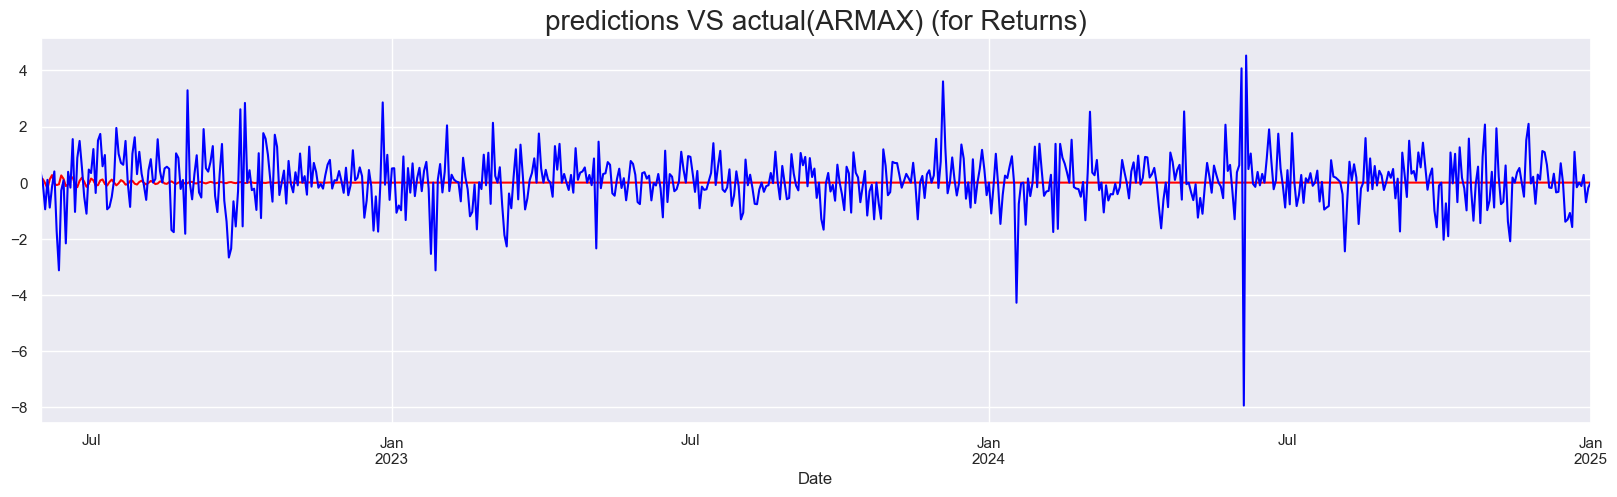

In [75]:
df_pred_SARMA_ret[start_date:end_date].plot(figsize=(20,5),color='red')
test.returns[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual(ARMAX) (for Returns)",size=20)

this wiglier at first but then it goes flat just like ARMA model but this wgliness gets long for 1-2 months unlike ARMA modle but it is not as much great as the max model

# now we will see the SARMAX model combining Seasonality and MAX model  (First price)

In [76]:
model_ar3_ma3_Xsensex_Xnifty_50_SARMAX=SARIMAX(df.Market_value,exog=df[['^BSESN','^NSEI']],order=(3,0,3),seasonal_order=(3,0,3,5))
results_ar3_ma3_Xsensex_Xnifty_50_SARMAX=model_ar3_ma3_Xsensex_Xnifty_50_SARMAX.fit()
results_ar3_ma3_Xsensex_Xnifty_50_SARMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      Market_value   No. Observations:                 3233
Model:             SARIMAX(3, 0, 3)x(3, 0, 3, 5)   Log Likelihood              -20657.826
Date:                           Sun, 28 Sep 2025   AIC                          41345.652
Time:                                   18:23:14   BIC                          41436.869
Sample:                               01-07-2010   HQIC                         41378.338
                                    - 05-30-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
^BSESN         0.5288      0.045     11.637      0.000       0.440       0.618
^NSEI          0.9753      0.153      6.364      0.000       0.675       1.276
ar.L1         -0.2959      0.046     -6.489      0.000      -0.385      -0.207
ar.L2          0.5433      0.062      8.818      0.000       0.423       0.664
ar.L3          0.7523      0.049     15.436      0.000       0.657       0.848
ma.L1          1.3631      0.050     27.335      0.000       1.265       1.461
ma.L2          0.8378      0.043     19.395      0.000       0.753       0.923
ma.L3          0.0467      0.013      3.685      0.000       0.022       0.071
ar.S.L5       -0.8441      0.099     -8.485      0.000      -1.039      -0.649
ar.S.L10       0.8942      0.086     10.437      0.000       0.726       1.062
ar.S.L15       0.9498      0.041     23.056      0.000       0.869       1.031
ma.S.L5        0.8462      0.098      8.617      0.000       0.654       1.039
ma.S.L10      -0.8912      0.089    -10.031      0.000      -1.065      -0.717
ma.S.L15      -0.9550      0.044    -21.867      0.000      -1.041      -0.869
sigma2      2.405e+04    340.304     70.659      0.000    2.34e+04    2.47e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):             15092.91
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               6.56   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
# predict by index positions
pred_SARMAX = results_ar3_ma3_Xsensex_Xnifty_50_SARMAX.get_forecast(
    steps=len(test),
    exog=test[["^BSESN","^NSEI"]]
).predicted_mean

Here I used Get_forcast because I was not able to get aligned results when using predict

Text(0.5, 1.0, 'predictions VS actual(ARMAX)')

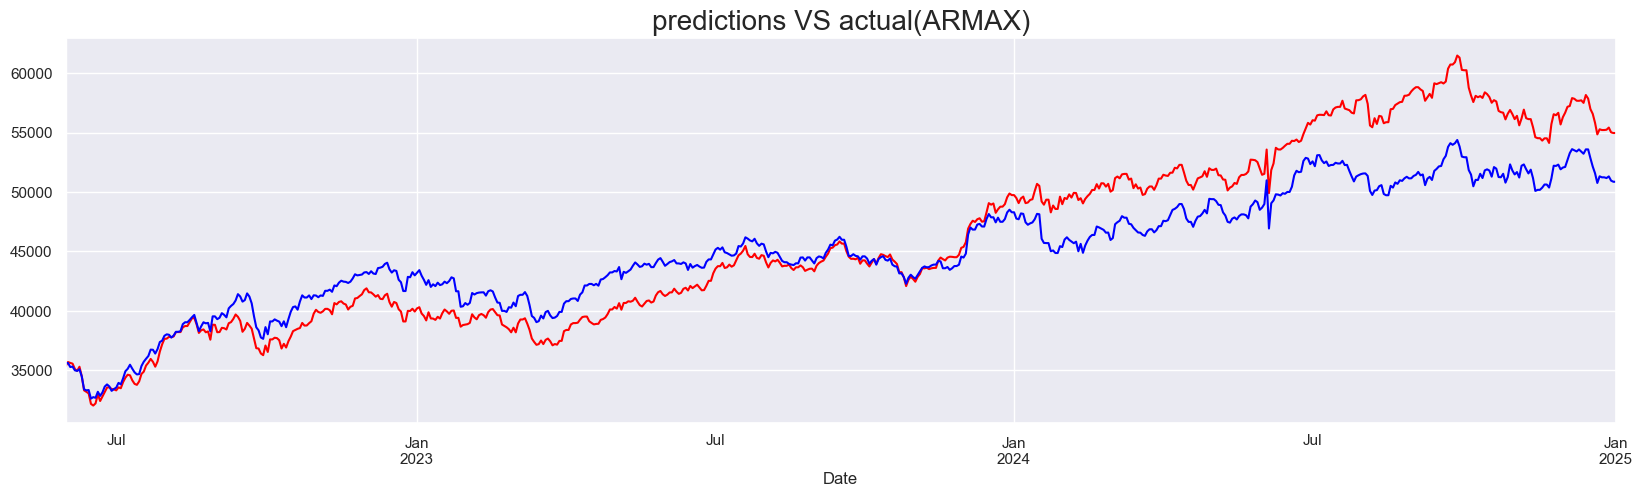

In [78]:
pred_SARMAX[start_date:end_date].plot(figsize=(20,5),color='red')
test.Market_value[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual(ARMAX)",size=20)

I think this a little too similar to ARMAX model I think they are same

# doing the same thing for Returns (stationary data) and lets see what happens 

In [79]:
model_ret_ar3_ma2_Xsensex_Xnifty_50_SARMAX=SARIMAX(df.returns,exog=df[['ret_nif50','ret_sensex']],order=(3,0,2),seasonal_order=(3,0,2,5))
results_ret_ar3_ma2_Xsensex_Xnifty_50_SARMAX=model_ret_ar3_ma2_Xsensex_Xnifty_50_SARMAX.fit()
results_ret_ar3_ma2_Xsensex_Xnifty_50_SARMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           returns   No. Observations:                 3233
Model:             SARIMAX(3, 0, 2)x(3, 0, 2, 5)   Log Likelihood               -3402.564
Date:                           Sun, 28 Sep 2025   AIC                           6831.129
Time:                                   18:23:28   BIC                           6910.184
Sample:                               01-07-2010   HQIC                          6859.457
                                    - 05-30-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_nif50      1.9053      0.061     31.055      0.000       1.785       2.026
ret_sensex    -0.6338      0.063    -10.119      0.000      -0.757      -0.511
ar.L1          1.8156      0.095     19.051      0.000       1.629       2.002
ar.L2         -0.9999      0.092    -10.814      0.000      -1.181      -0.819
ar.L3          0.0581      0.018      3.257      0.001       0.023       0.093
ma.L1         -1.7578      0.095    -18.578      0.000      -1.943      -1.572
ma.L2          0.8848      0.085     10.468      0.000       0.719       1.050
ar.S.L5        0.1386      1.343      0.103      0.918      -2.493       2.770
ar.S.L10       0.7888      1.288      0.613      0.540      -1.735       3.313
ar.S.L15      -0.0189      0.044     -0.427      0.669      -0.105       0.068
ma.S.L5       -0.1185      1.342     -0.088      0.930      -2.749       2.512
ma.S.L10      -0.7990      1.256     -0.636      0.525      -3.260       1.662
sigma2         0.4817      0.006     80.347      0.000       0.470       0.493
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             14353.84
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.47
Prob(H) (two-sided):                  0.01   Kurtosis:                        13.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
# predict by index positions
pred_SARMAX_ret= results_ret_ar3_ma2_Xsensex_Xnifty_50_SARMAX.predict(
    start=len(train["returns"]),
    end=len(train["returns"]) + len(test[["ret_nif50", "ret_sensex"]]) - 1,
    exog=test[["ret_nif50", "ret_sensex"]]
)

Text(0.5, 1.0, 'predictions VS actual(SARMAX) (for Returns)')

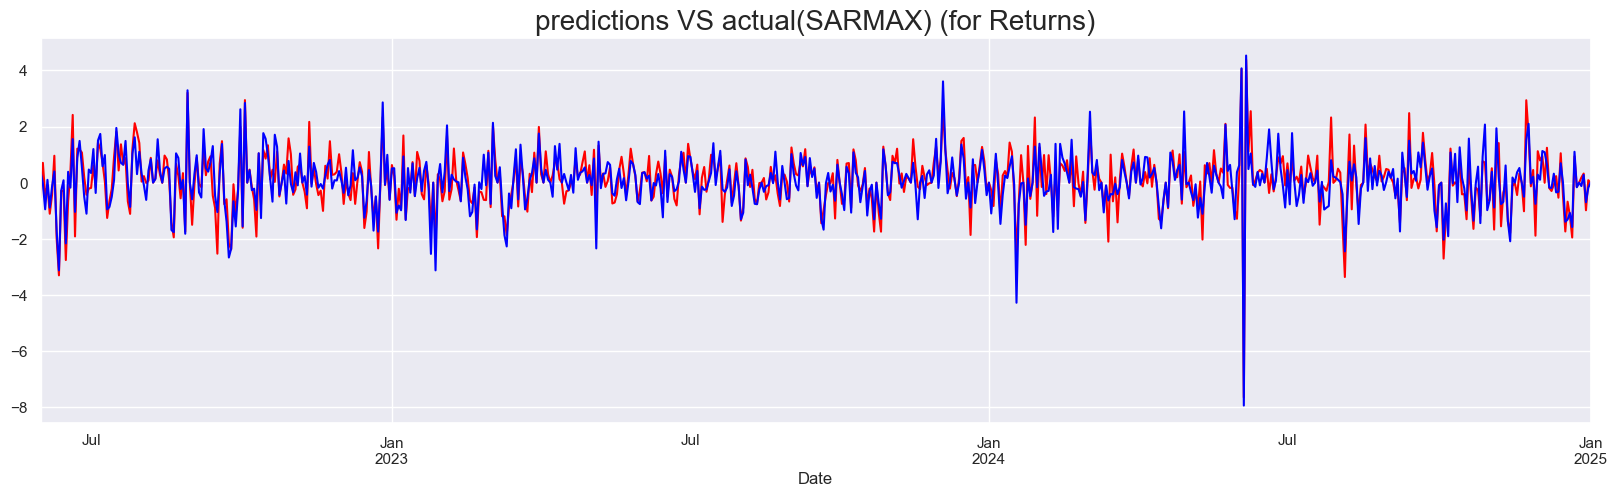

In [81]:
pred_SARMAX_ret[start_date:end_date].plot(figsize=(20,5),color='red')
test.returns[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual(SARMAX) (for Returns)",size=20)

This is much better than the ARMAX model when it comes to predicting stationary data and ARMAX model is better at predicting non-stationar data

## Now lets compare all the models with each other and see what happens

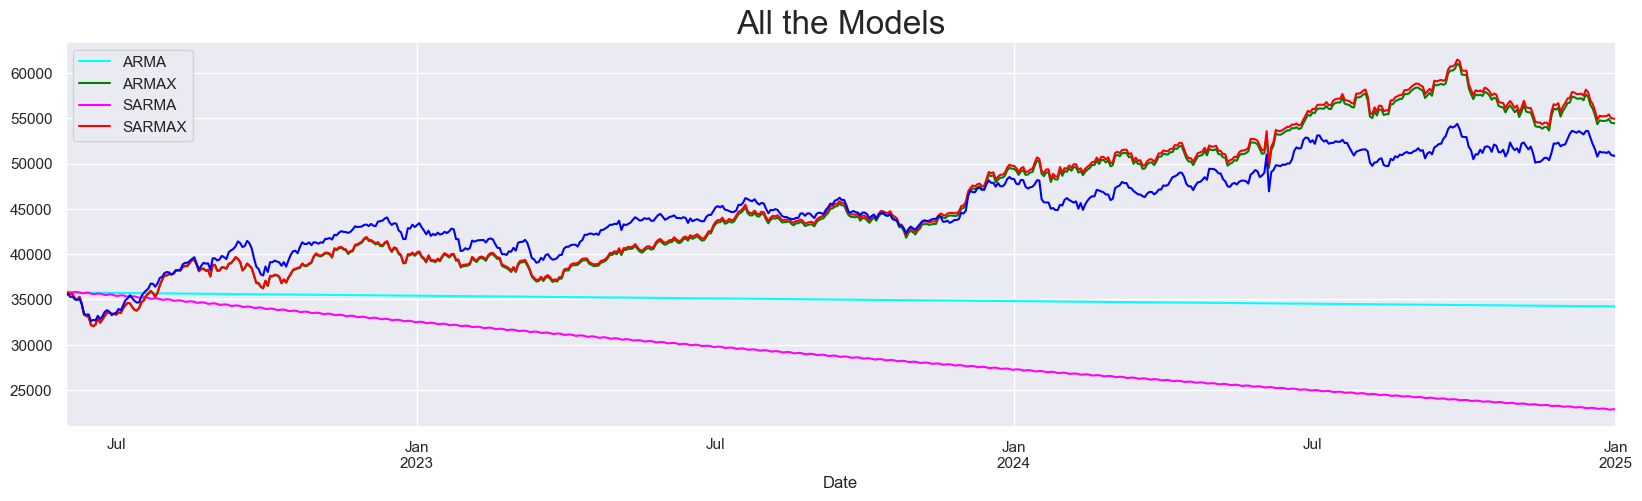

In [82]:
## for prices
df_pred[start_date:end_date].plot(figsize=(20,5),color = "cyan") # (ARMA)
pred_ARMAX[start_date:end_date].plot(figsize=(20,5),color = "green")
df_pred_SARMA[start_date:end_date].plot(figsize=(20,5),color = "magenta")
pred_SARMAX[start_date:end_date].plot(figsize=(20,5),color = "red")
test.Market_value[start_date:end_date].plot(figsize=(20,5),color = "blue")
plt.legend(['ARMA','ARMAX','SARMA','SARMAX'])
plt.title("All the Models", size = 24)
plt.show()

In prices we can see here that the ARMAX model is very colse or almost perfect match to SARMAX and the other models like ARMA SARMA are constantly decreasing

## Now doing the same thing for Returns

Text(0.5, 1.0, 'All the Models')

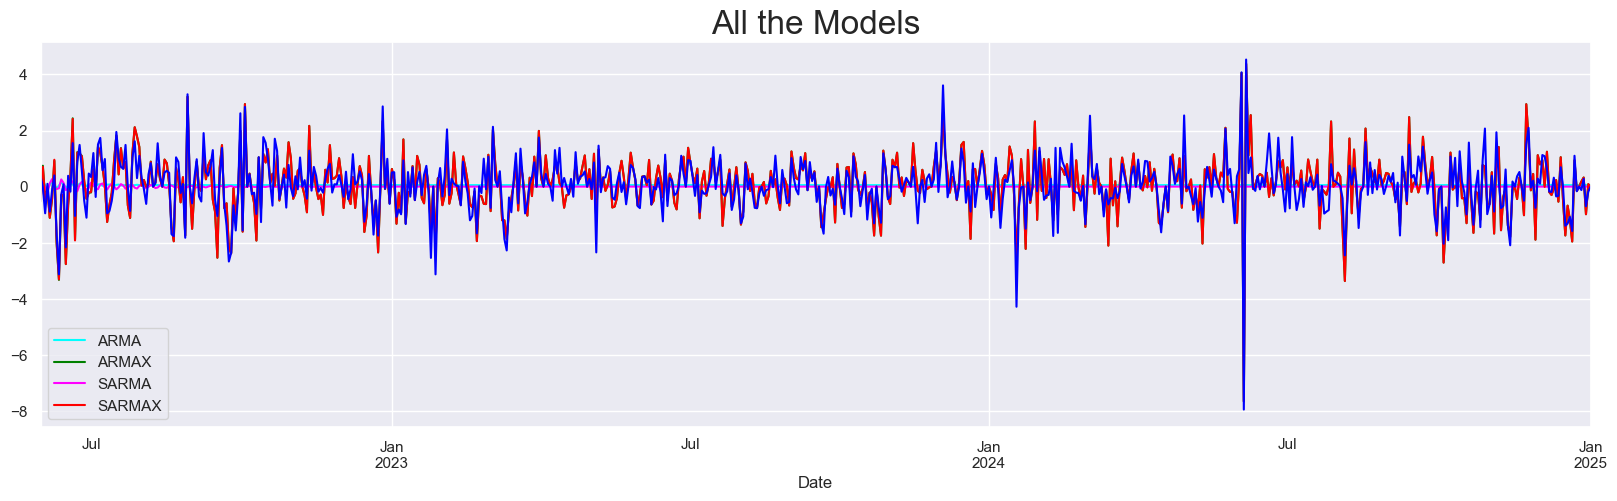

In [83]:
df_pred_returns[start_date:end_date].plot(figsize=(20,5),color = "cyan") # (ARMA)
pred_ARMAX_ret[start_date:end_date].plot(figsize=(20,5),color = "green")
df_pred_SARMA_ret[start_date:end_date].plot(figsize=(20,5),color = "magenta")
pred_SARMAX_ret[start_date:end_date].plot(figsize=(20,5),color = "red")
test.returns[start_date:end_date].plot(figsize=(20,5),color = "blue")
plt.legend(['ARMA','ARMAX','SARMA','SARMAX'])
plt.title("All the Models", size = 24)


here happened the same as we are not able to see the green line we can say that it is submeregred with the red line the SARMAX model 

## Now lets do some Evalution

In [84]:
## Importing the Evaluation Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
## geting the Evaluation Metrics for ARMA
mae_ARMA=mean_absolute_error(test.Market_value[start_date:end_date],df_pred[start_date:end_date])
mse_ARMA=mean_squared_error(test.Market_value[start_date:end_date],df_pred[start_date:end_date])
rmse_ARMA=sqrt(mse_ARMA)
r2_sc_ARMA=r2_score(test.Market_value[start_date:end_date],df_pred[start_date:end_date])

In [ ]:
## geting the Evaluation Metrics for ARMAX
mae_ARMAX=mean_absolute_error(test.Market_value[start_date:end_date],pred_ARMAX[start_date:end_date])
mse_ARMAX=mean_squared_error(test.Market_value[start_date:end_date],pred_ARMAX[start_date:end_date])
rmse_ARMAX=sqrt(mse_ARMAX)
r2_sc_ARMAX=r2_score(test.Market_value[start_date:end_date],pred_ARMAX[start_date:end_date])

In [ ]:
## geting the Evaluation Metrics for SARMA
mae_SARMA=mean_absolute_error(test.Market_value[start_date:end_date],df_pred_SARMA[start_date:end_date])
mse_SARMA=mean_squared_error(test.Market_value[start_date:end_date],df_pred_SARMA[start_date:end_date])
rmse_SARMA=sqrt(mse_SARMA)
r2_sc_SARMA=r2_score(test.Market_value[start_date:end_date],df_pred_SARMA[start_date:end_date])

In [88]:
## geting the Evaluation Metrics for SARMAX
mae_SARMAX=mean_absolute_error(test.Market_value[start_date:end_date],pred_SARMAX[start_date:end_date])
mse_SARMAX=mean_squared_error(test.Market_value[start_date:end_date],pred_SARMAX[start_date:end_date])
rmse_SARMAX=sqrt(mse_SARMAX)
r2_sc_SARMAX=r2_score(test.Market_value[start_date:end_date],pred_SARMAX[start_date:end_date])

In [89]:
## Comparing them with MAE
print("MAE of ARMA is :",mae_ARMA)
print("MAE of ARMAX is :",mae_ARMAX)
print("MAE of SARMA is :",mae_SARMA)
print("MAE of SARMAX is :",mae_SARMAX)

MAE of ARMA is : 10129.95664542145
MAE of ARMAX is : 2462.15837411101
MAE of SARMA is : 16154.085964184877
MAE of SARMAX is : 2555.109459174808


I dont know why SARMAX is performing less than ARMAX

In [90]:
## Comparing them with MSE
print("MSE of ARMA is :",mse_ARMA)
print("MSE of ARMAX is :",mse_ARMAX)
print("MSE of SARMA is :",mse_SARMA)
print("MSE of SARMAX is :",mse_SARMAX)

MSE of ARMA is : 127745601.7104462
MSE of ARMAX is : 8917277.255492618
MSE of SARMA is : 330127972.44318515
MSE of SARMAX is : 10028471.11497608


In [91]:
## Comparing them with RMSE
print("RMSE of ARMA is :",rmse_ARMA)
print("RMSE of ARMAX is :",rmse_ARMAX)
print("RMSE of SARMA is :",rmse_SARMA)
print("RMSE of SARMAX is :",rmse_SARMAX)

RMSE of ARMA is : 11302.459984907984
RMSE of ARMAX is : 2986.1810486795034
RMSE of SARMA is : 18169.424108737876
RMSE of SARMAX is : 3166.7761390688925


In [98]:
## Comparing them with R2 Score
print("R2 score of ARMA is :",r2_sc_ARMA)
print("R2 score of ARMAX is :",r2_sc_ARMAX)
print("R2 score of SARMA is :",r2_sc_SARMA)
print("R2 score of SARMAX is :",r2_sc_SARMAX)

R2 score of ARMA is : -4.33042830625916
R2 score of ARMAX is : 0.6279096386803279
R2 score of SARMA is : -12.775217819144684
R2 score of SARMAX is : 0.5815429605088347


Here the best performing is ARMAX

## Now lets do same thing for Returns model |

In [93]:
## geting the Evaluation Metrics for ARMA
mae_ARMA_ret=mean_absolute_error(test.Market_value[start_date:end_date],df_pred_returns[start_date:end_date])
mse_ARMA_ret=mean_squared_error(test.Market_value[start_date:end_date],df_pred_returns[start_date:end_date])
rmse_ARMA_ret=sqrt(mse_ARMA_ret)
r2_sc_ARMA_ret=r2_score(test.Market_value[start_date:end_date],df_pred_returns[start_date:end_date])

In [94]:
## geting the Evaluation Metrics for ARMAX
mae_ARMAX_ret=mean_absolute_error(test.Market_value[start_date:end_date],pred_ARMAX_ret[start_date:end_date])
mse_ARMAX_ret=mean_squared_error(test.Market_value[start_date:end_date],pred_ARMAX_ret[start_date:end_date])
rmse_ARMAX_ret=sqrt(mse_ARMAX_ret)
r2_sc_ARMAX_ret=r2_score(test.Market_value[start_date:end_date],pred_ARMAX_ret[start_date:end_date])

In [95]:
## geting the Evaluation Metrics for SARMA
mae_SARMA_ret=mean_absolute_error(test.Market_value[start_date:end_date],df_pred_SARMA_ret[start_date:end_date])
mse_SARMA_ret=mean_squared_error(test.Market_value[start_date:end_date],df_pred_SARMA_ret[start_date:end_date])
rmse_SARMA_ret=sqrt(mse_SARMA_ret)
r2_sc_SARMA_ret=r2_score(test.Market_value[start_date:end_date],df_pred_SARMA_ret[start_date:end_date])

In [97]:
## geting the Evaluation Metrics for SARMA
mae_SARMAX_ret=mean_absolute_error(test.Market_value[start_date:end_date],pred_SARMAX_ret[start_date:end_date])
mse_SARMAX_ret=mean_squared_error(test.Market_value[start_date:end_date],pred_SARMAX_ret[start_date:end_date])
rmse_SARMAX_ret=sqrt(mse_SARMA_ret)
r2_sc_SARMAX_ret=r2_score(test.Market_value[start_date:end_date],pred_SARMAX_ret[start_date:end_date])

In [99]:
## Comparing them with MAE
print("MAE of ARMA (For Returns) is :",mae_ARMA_ret)
print("MAE of ARMAX (For Returns) is :",mae_ARMAX_ret)
print("MAE of SARMA (For Returns) is :",mae_SARMA_ret)
print("MAE of SARMAX (For Returns) is :",mae_SARMAX_ret)

MAE of ARMA (For Returns) is : 44963.46873195142
MAE of ARMAX (For Returns) is : 44963.44961538553
MAE of SARMA (For Returns) is : 44963.45103629467
MAE of SARMAX (For Returns) is : 44963.45103629467


Why they are too similar

In [100]:
## Comparing them with MSE
print("MSE of ARMA (For Returns) is :",mse_ARMA_ret)
print("MSE of ARMAX (For Returns) is :",mse_ARMAX_ret)
print("MSE of SARMA (For Returns) is :",mse_SARMA_ret)
print("MSE of SARMAX (For Returns) is :",mse_SARMAX_ret)

MSE of ARMA (For Returns) is : 2045678877.4310083
MSE of ARMAX (For Returns) is : 2045676836.708668
MSE of SARMA (For Returns) is : 2045676961.9982638
MSE of SARMAX (For Returns) is : 2045676961.9982638


In [101]:
## Comparing them with RMSE
print("RMSE of ARMA (For Returns) is :",rmse_ARMA_ret)
print("RMSE of ARMAX (For Returns) is :",rmse_ARMAX_ret)
print("RMSE of SARMA (For Returns) is :",rmse_SARMA_ret)
print("RMSE of SARMAX (For Returns) is :",rmse_SARMAX_ret)

RMSE of ARMA (For Returns) is : 45229.18170198316
RMSE of ARMAX (For Returns) is : 45229.15914218026
RMSE of SARMA (For Returns) is : 45229.16052723357
RMSE of SARMAX (For Returns) is : 45229.16052723357


In [102]:
## Comparing them with R2 Score
print("R2 score of ARMA (For Returns) is :",r2_sc_ARMA_ret)
print("R2 score of ARMAX (For Returns) is :",r2_sc_ARMAX_ret)
print("R2 score of SARMA (For Returns) is :",r2_sc_SARMA_ret)
print("R2 score of SARMAX (For Returns) is :",r2_sc_SARMAX_ret)

R2 score of ARMA (For Returns) is : -84.35984368754218
R2 score of ARMAX (For Returns) is : -84.35975853451944
R2 score of SARMA (For Returns) is : -84.35976376246623
R2 score of SARMAX (For Returns) is : -84.35976376246623


There Differences are less than 100 some times just 0.1 I dont know why is this is happeneing 

The best model I got by doing all these evaluation metrixs is ARMAX model it out performs SARMAX